In [16]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib
%pip install pymetis

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 338 kB 4.7 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for pymetis: filename=PyMetis-2022.1-cp39-cp39-linux_x86_64.whl size=178563 sha256=f9b0c8d90d0995c064c8d93361ab6a06f05c552411eddd0ced910a5a64e407ba
  Stored in directory: /home/jovyan/.cache/pip/wheels/a8/ce/d3/2d5340dba0a26cbc700a4588ec18a4a1921f1ee08966277930
Successfully built pymetis
Note: you may need to restart the kernel to use updated packages.


In [17]:
# The starter code is short and simple, take a look!
from starter import *
import pymetis

# Phase 1 - Create Inputs

In [18]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

import random

def small(G: nx.Graph):
    for i in range(100):
        for j in range(100):
            if i != j:
                G.add_edge(i, j, weight=random.randint(1, 1000))
    
def medium(G: nx.Graph):
    already_in = []
    i = 0
    while i <= 10000:
        rand_v1 = random.randint(0, 299)
        rand_v2 = random.randint(0, 299)
        rand_v = 1000 * rand_v1 + rand_v2
        if rand_v in already_in or rand_v1 == rand_v2:
            continue
        i += 1
        already_in.append(rand_v)
        G.add_edge(rand_v1, rand_v2, weight=random.randint(1, 1000))
        
    
def large(G: nx.Graph):
    already_in = []
    i = 0
    while i <= 10000:
        rand_v1 = random.randint(0, 999)
        rand_v2 = random.randint(0, 999)
        rand_v = 1000 * rand_v1 + rand_v2
        if rand_v in already_in or rand_v1 == rand_v2:
            continue
        i += 1
        already_in.append(rand_v)
        G.add_edge(rand_v1, rand_v2, weight=random.randint(1, 1000))

In [20]:
G = nx.empty_graph(N_SMALL)
small(G)
write_input(G, 'small.in')

G = nx.empty_graph(N_MEDIUM)
medium(G)
write_input(G, 'medium.in')

G = nx.empty_graph(N_LARGE)
large(G)
write_input(G, 'large.in')

# Phase 2 - Implement your Solver

In [50]:
def solve(G: nx.Graph):
    # TODO implement this function with your solver
    # Assign a team to v with G.nodes[v]['team'] = team_id
    # Access the team of v with team_id = G.nodes[v]['team']
    
    low_k = 2
    high_k = 20
    
    # random partition, equal as possible
#     random_nodes_order = list(G.nodes)
#     np.random.shuffle(random_nodes_order)
#     for i in range(len(random_nodes_order)):
#         G.nodes[random_nodes_order[i]]['team'] = (i % k) + 1
        
    # METIS partition
    min_score = float('inf')
    min_teams = [0 for i in range(len(G))]
    for k in range(low_k, high_k):
        n_cuts, teams = pymetis.part_graph(k, G)
        for i in range(len(teams)):
            G.nodes[i]['team'] = teams[i] + 1
        curr_score = score(G)
        if curr_score < min_score:
            min_score = curr_score
            min_teams = teams
    for i in range(len(min_teams)):
        G.nodes[i]['team'] = min_teams[i] + 1
    
        

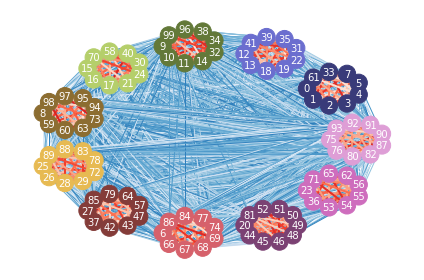

227117.14243574018

In [51]:
G = read_input('small.in')
solve(G)
validate_output(G)
visualize(G)
score(G)

In [52]:
run(solve, 'small.in', 'small.out')

small.in: cost 227117.14243574018


In [55]:
run_all(solve, 'inputs', 'output')
tar('output')

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large1.in: cost 2043901.7391558448
inputs/large10.in: cost 1440653.8432657009
inputs/large100.in: cost 8621805.66381719
inputs/large101.in: cost 1463320.777742541
inputs/large102.in: cost 1500056.777742541
inputs/large103.in: cost 3523455.8590655676
inputs/large104.in: cost 2128845.7394670327
inputs/large105.in: cost 2954842.7831835723
inputs/large106.in: cost 438332.612149386
inputs/large107.in: cost 823664.9839073124
inputs/large108.in: cost 500272.8281828459
inputs/large109.in: cost 1221658.407213836
inputs/large11.in: cost 571670.8571367448
inputs/large110.in: cost 1579664.6985413602
inputs/large111.in: cost 2416420.728167047
inputs/large112.in: cost 1441986.7191356628
inputs/large113.in: cost 1821198.9922992373
inputs/large114.in: cost 456813.9513791538
inputs/large115.in: cost 598219.2493960704
inputs/large116.in: cost 778665.4095120527
inputs/large117.in: cost 1095398.611390393
inputs/large118.in: cost 462426.8432657008
inputs/large119.in: cost 319827.5887779038
inputs/la